In [1]:
import pickle

with open('/home/maria/LuckyMouse4/data/unified_neuron_data.pkl', 'rb') as f:
    data = pickle.load(f)

In [ ]:
import numpy as np
#np.save('brain_area.npy',data['brain_area'])

In [6]:
r2=np.load('/home/maria/LuckyMouse4/data/cifar10_r2.npy')
vecs=np.load('/home/maria/LuckyMouse4/data/cifar10_vectors.npy')
brain_area=np.load('/home/maria/LuckyMouse4/data/brain_area.npy',allow_pickle=True)

In [8]:
X=vecs[r2>0.05]
labels=brain_area[r2>0.05]

In [9]:
labels

array(['VISp', 'VISp', 'VISp', 'VISp', 'VISp', 'VISp', 'VISp', 'VISp',
       'VISp', 'VISp', 'VISp', 'VISp', 'VISp', 'VISp', 'VISp', 'VISp',
       'VISp', 'VISp', 'VISp', 'VISp', 'VISl', 'VISl', 'VISp', 'VISp',
       'VISp', 'VISp', 'VISp', 'VISp', 'VISal', 'VISal', 'VISal', 'VISal',
       'VISal', 'VISpm', 'VISp', 'VISp', 'VISal', 'VISal', 'VISal',
       'VISal', 'VISal', 'VISal', 'VISl', 'VISl', 'VISp', 'VISp', 'VISp',
       'VISp', 'VISl', 'VISl', 'VISl', 'VISl', 'VISl', 'VISl', 'VISpm',
       'VISpm', 'VISpm', 'VISpm', 'VISal', 'VISal', 'VISal', 'VISpm',
       'VISpm', 'VISpm', 'VISal', 'VISal', 'VISal', 'VISl', 'VISl',
       'VISl', 'VISal', 'VISl', 'VISl', 'VISl', 'VISl', 'VISl', 'VISl',
       'VISl', 'VISp', 'VISp', 'VISp', 'VISp', 'VISp', 'VISp', 'VISp',
       'VISp', 'VISpm', 'VISl', 'VISl', 'VISp', 'VISp', 'VISp', 'VISpm',
       'VISpm', 'VISpm', 'VISp', 'VISp', 'VISp', 'VISp', 'VISp', 'VISp',
       'VISp', 'VISp', 'VISp', 'VISp', 'VISp', 'VISp', 'VISp', 'VISp',


In [10]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Encode string labels to integers
le = LabelEncoder()
y = le.fit_transform(labels)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Multinomial logistic regression with L2 regularization
clf = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    C=1.0
)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# If you want probability outputs:
probs = clf.predict_proba(X_test)
print("Predicted probability shape:", probs.shape)


Accuracy: 0.473
              precision    recall  f1-score   support

       VISal       0.00      0.00      0.00         9
       VISam       0.00      0.00      0.00         4
        VISl       0.45      0.67      0.54        27
        VISp       0.50      0.65      0.57        26
       VISpm       0.00      0.00      0.00         7
       VISrl       0.00      0.00      0.00         1

    accuracy                           0.47        74
   macro avg       0.16      0.22      0.18        74
weighted avg       0.34      0.47      0.40        74

Predicted probability shape: (74, 6)


/home/maria/LuckyMouse4/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/maria/LuckyMouse4/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/maria/LuckyMouse4/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
import pickle

with open('/home/maria/LuckyMouse4/data/unified_neuron_data.pkl', 'rb') as f:
    data = pickle.load(f)

data

,neuron_idx,r2,status,brain_area,vector
0,0,-0.0013,non_significant,VISp,"[-0.055515847015264144, -0.06281640709097443, ..."
1,1,-0.0106,non_significant,VISp,"[-0.03132956171357126, 0.007543800166609883, -..."
2,2,-0.0200,non_significant,VISp,"[-0.06289737956900776, -0.04065543969096044, -..."
3,3,-0.0193,non_significant,VISp,"[0.09928743044593512, 0.07726972462597245, -0...."
4,4,-0.0211,non_significant,VISp,"[-0.07683160972148292, -0.020394622810971298, ..."
...,...,...,...,...,...
39204,39204,-0.0502,non_significant,VISpm,"[-0.08650287774731587, -0.012723620718172082, ..."
39205,39205,-0.0253,non_significant,VISpm,"[0.06099192974807547, 0.02946246084023767, 0.0..."
39206,39206,0.0282,weakly_significant,VISpm,"[-0.02984685095724833, 0.006072446277957244, 0..."
39207,39207,-0.0182,non_significant,VISpm,"[-0.056784972913069595, -0.020615694610574237,..."


Classes: ['VISal', 'VISam', 'VISl', 'VISp', 'VISpm', 'VISrl']
Hold-out accuracy: 0.385
              precision    recall  f1-score   support

       VISal       0.24      0.27      0.25       122
       VISam       0.09      0.31      0.14        32
        VISl       0.51      0.30      0.38       317
        VISp       0.65      0.52      0.58       388
       VISpm       0.15      0.27      0.19        74
       VISrl       0.03      0.25      0.06         8

    accuracy                           0.38       941
   macro avg       0.28      0.32      0.27       941
weighted avg       0.48      0.38      0.42       941



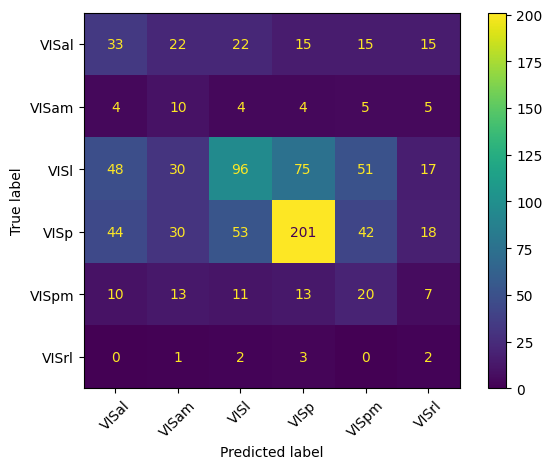

CV accuracy: mean=0.375 ± 0.009
CV macro-F1: mean=0.268 ± 0.006


In [13]:
import numpy as np
import pandas as pd
from ast import literal_eval

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- 1) Filter by r2 and extract X, y ----------------------------------------
# df is your DataFrame with columns: neuron_idx, r2, status, brain_area, vector
df=data
mask = df["r2"] > 0.05
df_sig = df.loc[mask, ["brain_area", "vector"]].copy()

# If vectors are strings like "[0.1, -0.2, ...]", parse them; otherwise leave as-is
if isinstance(df_sig["vector"].iloc[0], str):
    df_sig["vector"] = df_sig["vector"].apply(literal_eval)

# Ensure all vectors are numpy arrays and stack
X = np.stack(df_sig["vector"].apply(np.asarray).to_numpy())
labels = df_sig["brain_area"].astype(str).to_numpy()

# --- 2) Encode labels ---------------------------------------------------------
le = LabelEncoder()
y = le.fit_transform(labels)
class_names = le.classes_
print("Classes:", list(class_names))

# --- 3) Train/test split ------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 4) Fit multinomial logistic regression (balanced) ------------------------
clf = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=2000,
    C=1.0,
    class_weight="balanced"   # helps with rare brain areas
)
clf.fit(X_train, y_train)

# --- 5) Evaluate on hold-out --------------------------------------------------
y_pred = clf.predict(X_test)
print(f"Hold-out accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))

# Optional: confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.arange(len(class_names)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45)
plt.tight_layout()
plt.show()

# --- 6) Cross-validation (robust estimate) ------------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc_cv = cross_val_score(clf, X, y, cv=cv, scoring="accuracy")
f1m_cv = cross_val_score(clf, X, y, cv=cv, scoring="f1_macro")

print(f"CV accuracy: mean={acc_cv.mean():.3f} ± {acc_cv.std():.3f}")
print(f"CV macro-F1: mean={f1m_cv.mean():.3f} ± {f1m_cv.std():.3f}")


Hold-out accuracy: 0.300
              precision    recall  f1-score   support

       VISal       0.17      0.12      0.14         8
       VISam       0.17      0.25      0.20         8
        VISl       0.29      0.25      0.27         8
        VISp       0.67      0.44      0.53         9
       VISpm       0.33      0.22      0.27         9
       VISrl       0.31      0.50      0.38         8

    accuracy                           0.30        50
   macro avg       0.32      0.30      0.30        50
weighted avg       0.33      0.30      0.30        50



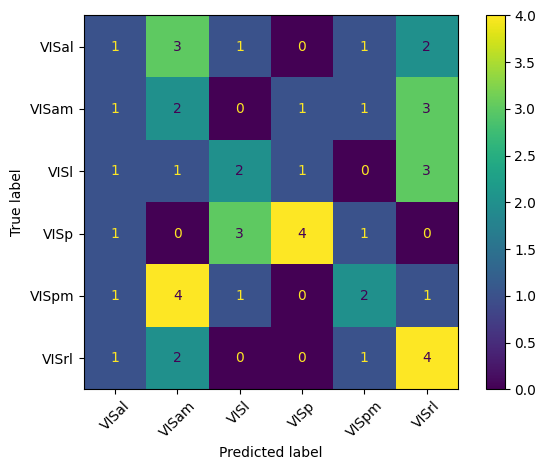

In [14]:
import numpy as np
from ast import literal_eval
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- 1) Filter significant neurons ---
mask = df["r2"] > 0.05
df_sig = df.loc[mask, ["brain_area", "vector"]].copy()

# Convert string vectors to arrays if needed
if isinstance(df_sig["vector"].iloc[0], str):
    df_sig["vector"] = df_sig["vector"].apply(literal_eval)

# --- 2) Balance the dataset ---
min_count = df_sig["brain_area"].value_counts().min()
df_balanced = (
    df_sig.groupby("brain_area", group_keys=False)
          .apply(lambda x: x.sample(min_count, random_state=42))
          .reset_index(drop=True)
)

# --- 3) Prepare X and y ---
X = np.stack(df_balanced["vector"].apply(np.asarray).to_numpy())
labels = df_balanced["brain_area"].astype(str).to_numpy()

# Encode labels
le = LabelEncoder()
y = le.fit_transform(labels)
class_names = le.classes_

# --- 4) Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 5) Standardize features ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- 6) Logistic Regression with stronger regularization ---
clf = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=2000,
    C=0.5,                # <--- smaller C = stronger regularization
)
clf.fit(X_train, y_train)

# --- 7) Evaluation ---
y_pred = clf.predict(X_test)
print(f"Hold-out accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.arange(len(class_names)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45)
plt.tight_layout()
plt.show()


In [19]:
import numpy as np
from ast import literal_eval
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score

# --- Filter significant neurons ---
mask = df["r2"] > 0.05
df_sig = df.loc[mask, ["brain_area", "vector"]].copy()

# Parse string vectors if needed
if isinstance(df_sig["vector"].iloc[0], str):
    df_sig["vector"] = df_sig["vector"].apply(literal_eval)

# Prepare arrays
X_all = np.stack(df_sig["vector"].apply(np.asarray).to_numpy())
labels_all = df_sig["brain_area"].astype(str).to_numpy()

# Encode labels
le = LabelEncoder()
y_all = le.fit_transform(labels_all)
class_names = le.classes_

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

acc_scores, f1m_scores = [], []

for train_idx, test_idx in cv.split(X_all, y_all):
    X_train_raw, y_train_raw = X_all[train_idx], y_all[train_idx]
    X_test, y_test = X_all[test_idx], y_all[test_idx]
    
    # --- Balance training set ---
    min_count = np.min(np.bincount(y_train_raw))
    balanced_indices = np.hstack([
        np.random.choice(np.where(y_train_raw == cls)[0], min_count, replace=False)
        for cls in np.unique(y_train_raw)
    ])
    
    X_train = X_train_raw[balanced_indices]
    y_train = y_train_raw[balanced_indices]
    
    # Standardize
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Train model
    clf = LogisticRegression(
        multi_class="multinomial",
        solver="lbfgs",
        max_iter=2000,
        C=10.0
    )
    clf.fit(X_train, y_train)
    
    # Evaluate
    y_pred = clf.predict(X_test)
    acc_scores.append(accuracy_score(y_test, y_pred))
    f1m_scores.append(f1_score(y_test, y_pred, average="macro"))

print(f"Balanced 5-fold CV Accuracy: {np.mean(acc_scores):.3f} ± {np.std(acc_scores):.3f}")
print(f"Balanced 5-fold CV Macro-F1: {np.mean(f1m_scores):.3f} ± {np.std(f1m_scores):.3f}")


Balanced 5-fold CV Accuracy: 0.230 ± 0.011
Balanced 5-fold CV Macro-F1: 0.179 ± 0.006
